In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    """Load the stock data from a CSV file."""
    data = pd.read_csv(file_path, parse_dates=['date'])
    return data

def plot_price_history(stock_data, permno):
    """Plot BIDLO, ASKHI, PRC, and OPENPRC for a specific stock."""
    stock = stock_data[stock_data['PERMNO'] == permno]

    plt.figure(figsize=(12, 6))
    plt.plot(stock['date'], stock['OPENPRC'], label='Open', alpha=0.7)
    plt.plot(stock['date'], stock['ASKHI'], label='High', alpha=0.7)
    plt.plot(stock['date'], stock['BIDLO'], label='Low', alpha=0.7)
    plt.plot(stock['date'], stock['PRC'], label='Close', alpha=0.7)
    plt.legend(loc='best')
    plt.title(f'Stock {permno} Price History')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

def plot_data_length(stock_data):
    """Plot the length of data available for each stock."""
    data_length = stock_data.groupby('PERMNO')['date'].nunique().sort_values()

    plt.figure(figsize=(12, 6))
    sns.barplot(y=data_length.index.astype(str), x=data_length.values, palette='viridis')
    plt.title('Number of Available Data Points per Stock (PERMNO)')
    plt.xlabel('Number of Data Points')
    plt.ylabel('PERMNO')
    plt.show()

def plot_date_ranges(stock_data):
    """Plot the date ranges for which data is available for each stock."""
    date_ranges = stock_data.groupby('PERMNO').agg(start=('date', 'min'), end=('date', 'max')).reset_index()

    plt.figure(figsize=(12, 6))
    for _, row in date_ranges.iterrows():
        plt.plot([row['start'], row['end']], [row['PERMNO'], row['PERMNO']], marker='o')

    plt.title('Data Availability Ranges per Stock (PERMNO)')
    plt.xlabel('Date')
    plt.ylabel('PERMNO')
    plt.grid(True)
    plt.show()

In [2]:
file_path = './Dataset/raw_data/filtered_stock.csv'  # Replace with your file path
stock_data = load_data(file_path)

In [3]:
len(stock_data['PERMNO'].unique())

4502

In [4]:
stock_data.head()

,PERMNO,date,BIDLO,ASKHI,PRC,VOL,SHROUT,OPENPRC,RET
0,0,2001-01-02,30.181,33.141,31.296,2261684,NaN,33.141,-0.071
1,0,2001-01-03,29.258,34.756,34.525,4502678,NaN,30.219,0.103
2,0,2001-01-04,34.025,36.717,35.832,4398388,NaN,34.987,0.038
3,0,2001-01-05,32.910,35.832,33.872,3277052,NaN,35.217,-0.055
4,0,2001-01-08,32.180,34.295,32.757,2273288,NaN,33.372,-0.033


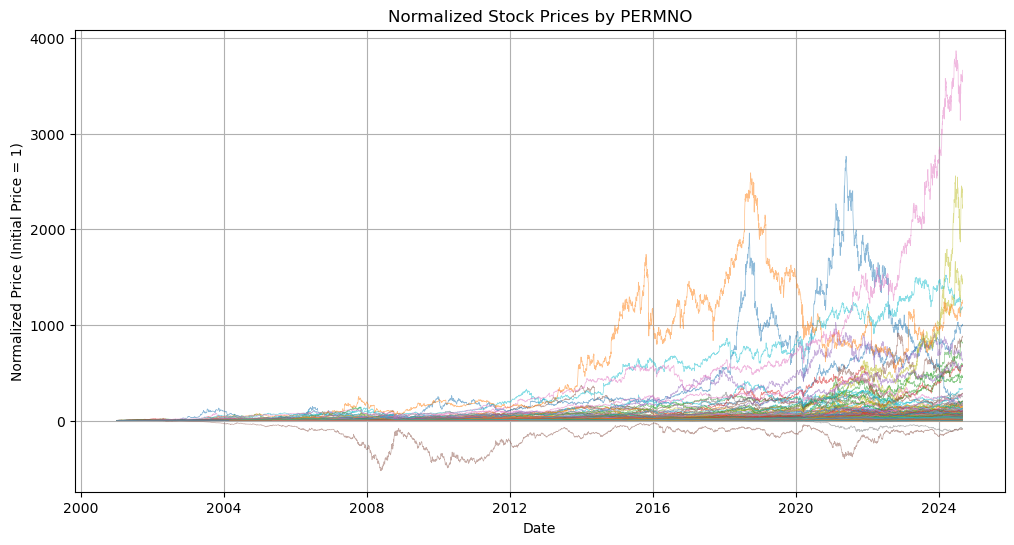

In [5]:
# 메모리 효율적인 방식으로 정규화 및 시각화
# 1. 날짜 인덱스 설정
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data.set_index('date', inplace=True)

# 2. 각 PERMNO별로 순차적으로 처리
plt.figure(figsize=(12, 6))

for permno in stock_data['PERMNO'].unique():
    # 해당 PERMNO의 데이터만 추출
    stock_slice = stock_data[stock_data['PERMNO'] == permno]['PRC']
    
    # 정규화 (초기 가격 = 1)
    normalized = stock_slice / stock_slice.iloc[0]
    
    # 그래프에 추가
    plt.plot(normalized.index, normalized.values, alpha=0.5, linewidth=0.5)

plt.title('Normalized Stock Prices by PERMNO')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Initial Price = 1)')
plt.grid(True)

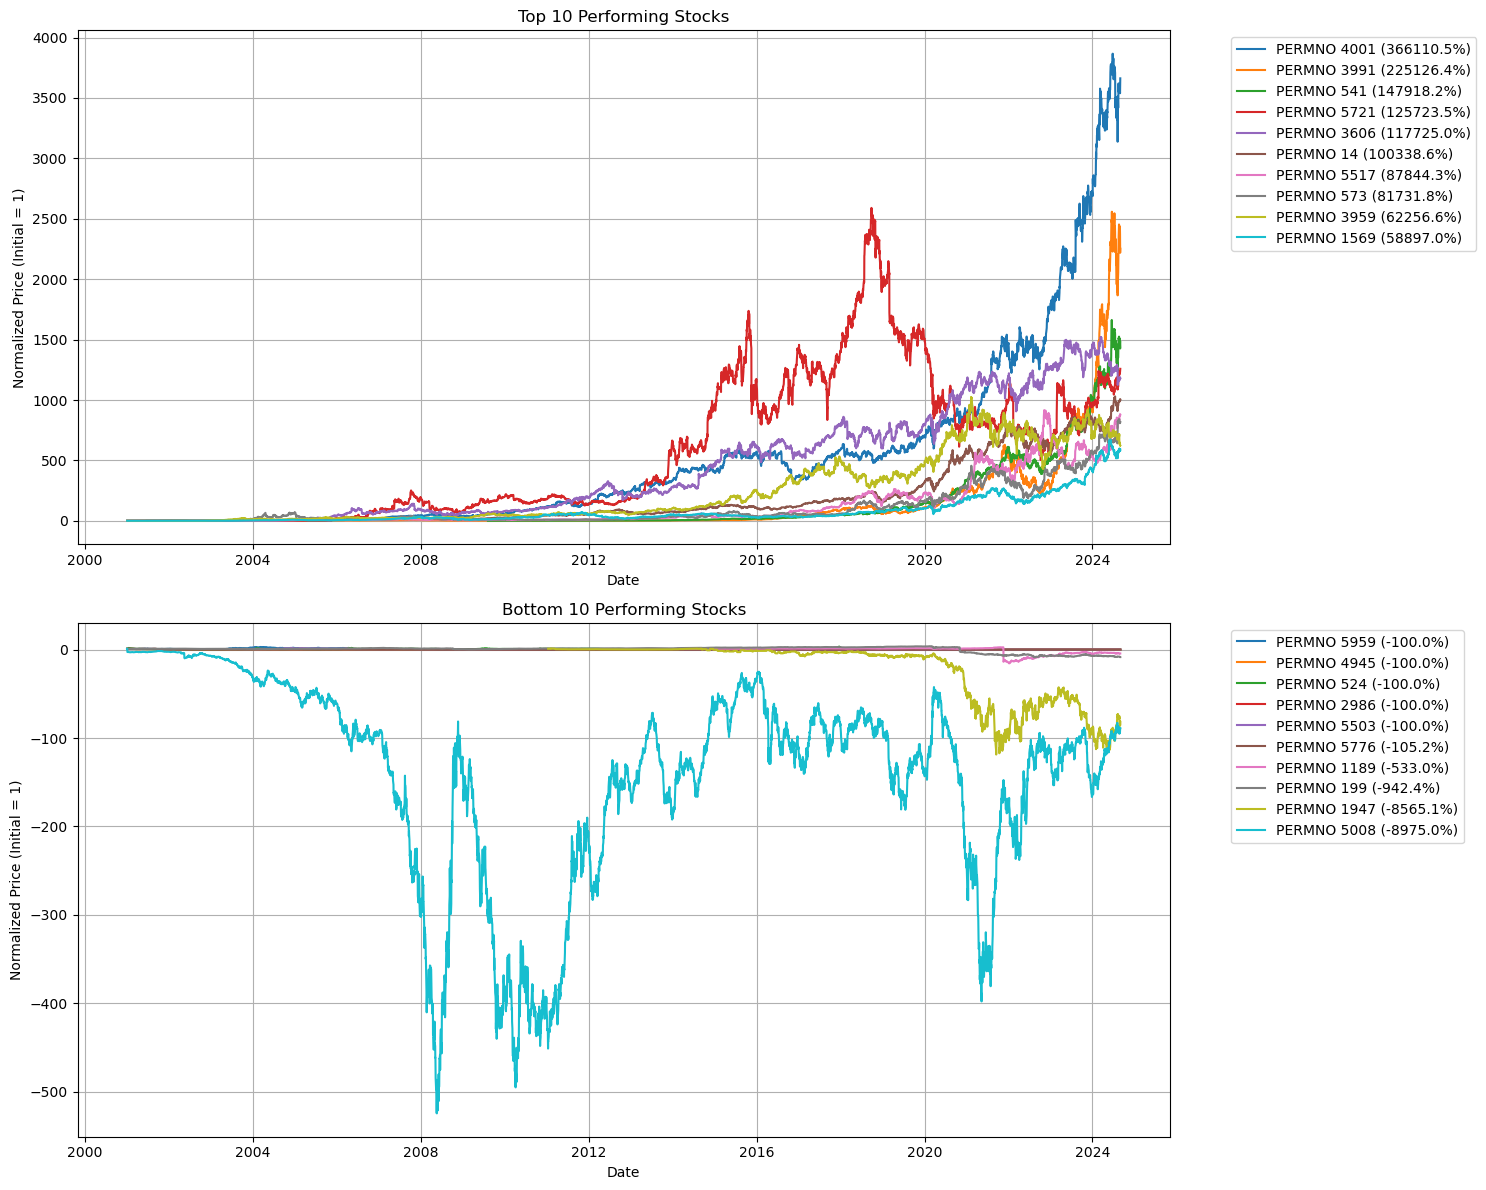


Top 10 Returns:
PERMNO 4001: 366110.5%
PERMNO 3991: 225126.4%
PERMNO 541: 147918.2%
PERMNO 5721: 125723.5%
PERMNO 3606: 117725.0%
PERMNO 14: 100338.6%
PERMNO 5517: 87844.3%
PERMNO 573: 81731.8%
PERMNO 3959: 62256.6%
PERMNO 1569: 58897.0%

Bottom 10 Returns:
PERMNO 5959: -100.0%
PERMNO 4945: -100.0%
PERMNO 524: -100.0%
PERMNO 2986: -100.0%
PERMNO 5503: -100.0%
PERMNO 5776: -105.2%
PERMNO 1189: -533.0%
PERMNO 199: -942.4%
PERMNO 1947: -8565.1%
PERMNO 5008: -8975.0%


In [6]:
# 각 PERMNO별 수익률 계산
returns_by_permno = {}
for permno in stock_data['PERMNO'].unique():
    stock_slice = stock_data[stock_data['PERMNO'] == permno]['PRC']
    if len(stock_slice) > 0:  # 데이터가 존재하는 경우만
        total_return = (stock_slice.iloc[-1] / stock_slice.iloc[0]) - 1
        returns_by_permno[permno] = total_return

# 수익률 기준으로 정렬하여 상위/하위 10개 PERMNO 선택
sorted_returns = pd.Series(returns_by_permno).sort_values(ascending=False)
top_10_permnos = sorted_returns.head(10).index
bottom_10_permnos = sorted_returns.tail(10).index

# 그래프 생성
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# 상위 10개 주식 시각화
for permno in top_10_permnos:
    stock_slice = stock_data[stock_data['PERMNO'] == permno]['PRC']
    normalized = stock_slice / stock_slice.iloc[0]
    ax1.plot(normalized.index, normalized.values, label=f'PERMNO {permno} ({returns_by_permno[permno]:.1%})')

ax1.set_title('Top 10 Performing Stocks')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Price (Initial = 1)')
ax1.grid(True)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 하위 10개 주식 시각화
for permno in bottom_10_permnos:
    stock_slice = stock_data[stock_data['PERMNO'] == permno]['PRC']
    normalized = stock_slice / stock_slice.iloc[0]
    ax2.plot(normalized.index, normalized.values, label=f'PERMNO {permno} ({returns_by_permno[permno]:.1%})')

ax2.set_title('Bottom 10 Performing Stocks')
ax2.set_xlabel('Date')
ax2.set_ylabel('Normalized Price (Initial = 1)')
ax2.grid(True)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# 상위/하위 10개 주식의 수익률 출력
print("\nTop 10 Returns:")
for permno in top_10_permnos:
    print(f"PERMNO {permno}: {returns_by_permno[permno]:.1%}")

print("\nBottom 10 Returns:")
for permno in bottom_10_permnos:
    print(f"PERMNO {permno}: {returns_by_permno[permno]:.1%}")

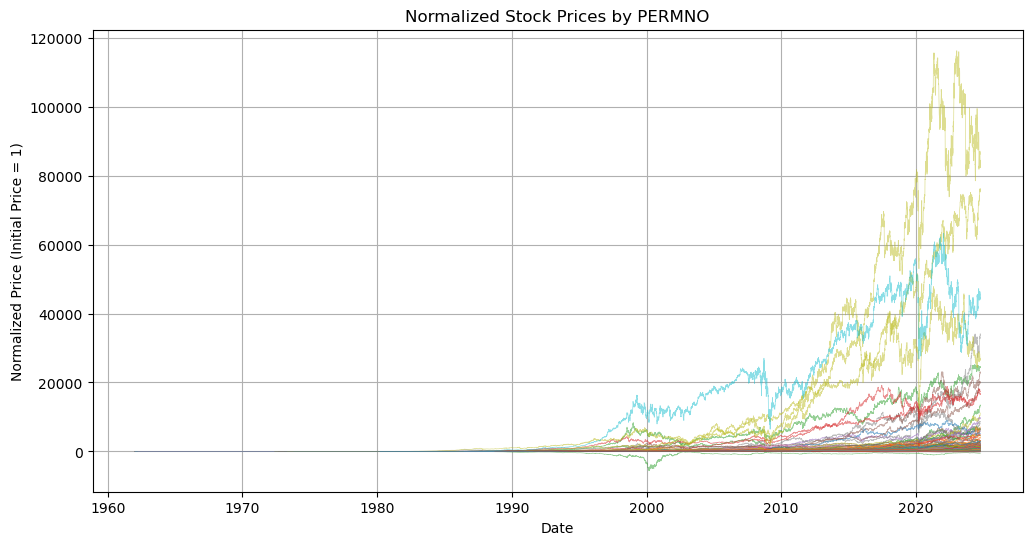

: 

In [20]:
all_path = './Dataset/raw_data/all_data.csv'  # Replace with your file path
all_data = load_data(all_path)

# 메모리 효율적인 방식으로 정규화 및 시각화
# 1. 날짜 인덱스 설정
all_data['date'] = pd.to_datetime(all_data['date'])
all_data.set_index('date', inplace=True)

# 2. 각 PERMNO별로 순차적으로 처리
plt.figure(figsize=(12, 6))

for permno in all_data['PERMNO'].unique():
    # 해당 PERMNO의 데이터만 추출
    stock_slice = all_data[all_data['PERMNO'] == permno]['PRC']
    
    # 정규화 (초기 가격 = 1)
    normalized = stock_slice / stock_slice.iloc[0]
    
    # 그래프에 추가
    plt.plot(normalized.index, normalized.values, alpha=0.5, linewidth=0.5)

plt.title('Normalized Stock Prices by PERMNO')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Initial Price = 1)')
plt.grid(True)

In [11]:
stock_data.reset_index(inplace=True)
stock_data.head()

,date,PERMNO,BIDLO,ASKHI,PRC,VOL,SHROUT,OPENPRC,RET
0,2001-01-02,0,30.181,33.141,31.296,2261684,NaN,33.141,-0.071
1,2001-01-03,0,29.258,34.756,34.525,4502678,NaN,30.219,0.103
2,2001-01-04,0,34.025,36.717,35.832,4398388,NaN,34.987,0.038
3,2001-01-05,0,32.910,35.832,33.872,3277052,NaN,35.217,-0.055
4,2001-01-08,0,32.180,34.295,32.757,2273288,NaN,33.372,-0.033


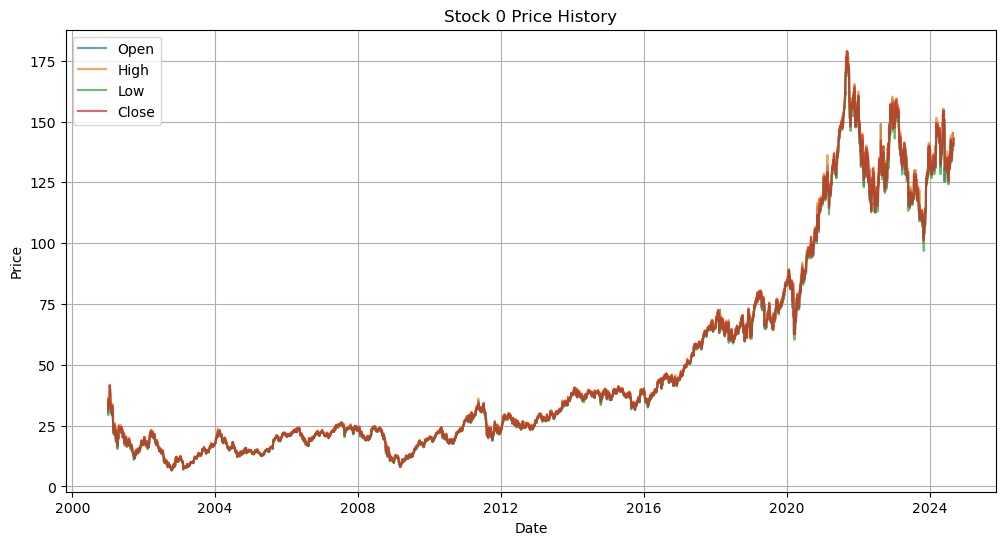

In [12]:
# Set the PERMNO you want to visualize
permno = 0  # Replace with the desired PERMNO

# Visualize the data
plot_price_history(stock_data, permno)


/tmp/ipykernel_594828/613090325.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data_length.index.astype(str), x=data_length.values, palette='viridis')


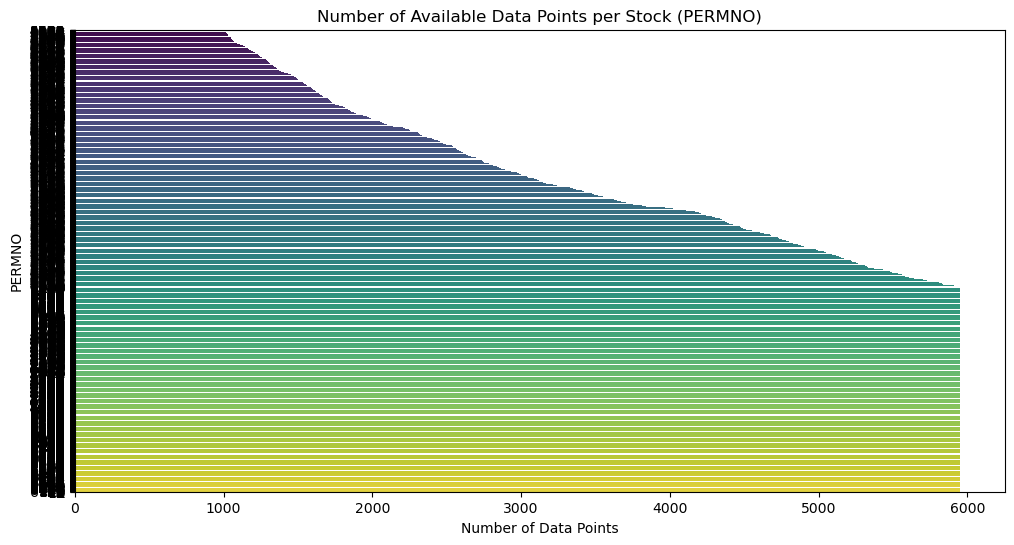

In [13]:
plot_data_length(stock_data)

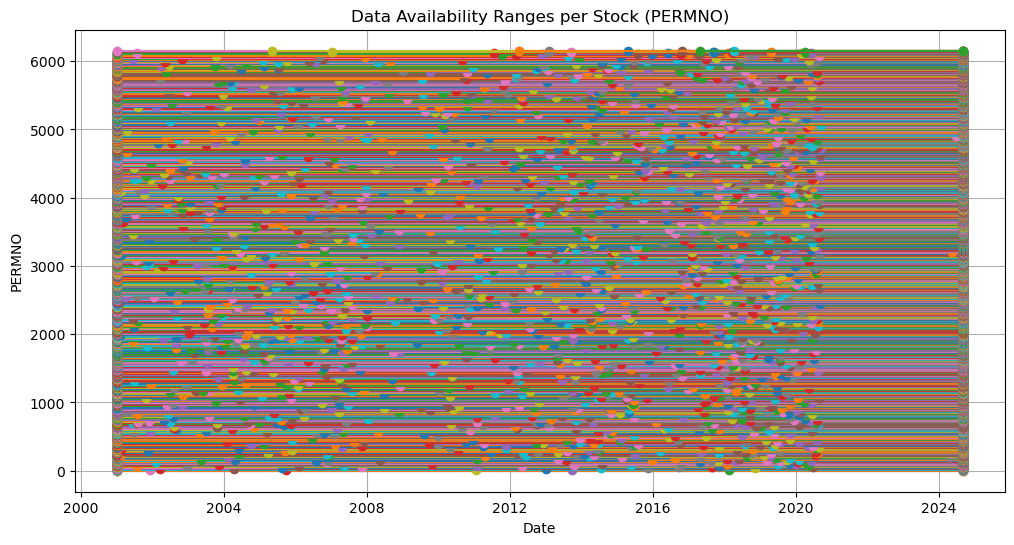

In [14]:
plot_date_ranges(stock_data)

In [19]:
stock_data

,date,PERMNO,BIDLO,ASKHI,PRC,VOL,SHROUT,OPENPRC,RET
0,2001-01-02,0,30.181,33.141,31.296,2261684,NaN,33.141,-0.071
1,2001-01-03,0,29.258,34.756,34.525,4502678,NaN,30.219,0.103
2,2001-01-04,0,34.025,36.717,35.832,4398388,NaN,34.987,0.038
3,2001-01-05,0,32.910,35.832,33.872,3277052,NaN,35.217,-0.055
4,2001-01-08,0,32.180,34.295,32.757,2273288,NaN,33.372,-0.033
...,...,...,...,...,...,...,...,...,...
15580663,2024-08-26,6154,11.345,11.580,11.540,737700,NaN,11.500,0.013
15580664,2024-08-27,6154,11.340,11.660,11.570,450000,NaN,11.510,0.003
15580665,2024-08-28,6154,11.260,11.650,11.380,764400,NaN,11.500,-0.016
15580666,2024-08-29,6154,11.290,11.770,11.720,1054200,NaN,11.460,0.030
